In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("iris.csv")
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
X = dataset[['sepal_length', 'sepal_width', 'petal_length']].values
y = dataset['class'].values

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_num = label_encoder.fit_transform(y)
print(y_num)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
y.shape

(150,)

In [6]:
y_num=y_num.reshape(-1,1)


In [7]:
y_setosa=np.where(y_num==0,1,0)
y_versicolor=np.where(y_num==1,1,0)
y_virginica=np.where(y_num==2,1,0)


In [8]:
y_setosa.shape

(150, 1)

# Setosa

In [9]:
#Split dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_setosa,test_size=0.2,random_state=42)
#Normalisation
X_train=(X_train - X_train.mean())/X_train.std()
X_test=(X_test  - X_test.mean())/X_test.std()


### 2. Modèle

In [10]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [12]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

### 3. Fonction Coût

In [13]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient

In [14]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [15]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [16]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5,A

### 5. Modèle final

In [17]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

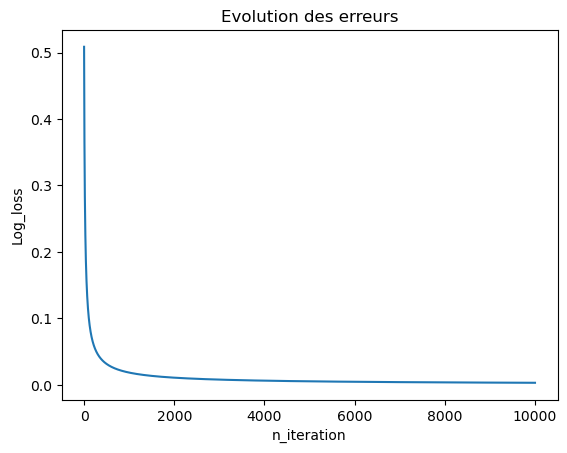

In [18]:
W,b=regression_logistique(X_train, y_train )

### 5. 1 Evaluation du modèle et Visualisation

In [19]:
from sklearn.metrics import accuracy_score
y_pred,setosa = predict(X_test, W, b)
print("Accuracy=",accuracy_score(y_test, y_pred))

[[1.60596227e-04]
 [9.92991739e-01]
 [2.69079292e-09]
 [5.07410591e-04]
 [2.99603087e-05]
 [9.93515397e-01]
 [2.15699692e-02]
 [2.17838485e-05]
 [4.49466574e-05]
 [3.07115627e-03]
 [6.28932331e-05]
 [9.95288903e-01]
 [9.96975986e-01]
 [9.94051938e-01]
 [9.98858338e-01]
 [4.69267273e-04]
 [3.39971138e-06]
 [2.51995890e-03]
 [6.74804073e-04]
 [4.48276450e-06]
 [9.95768731e-01]
 [1.47611168e-04]
 [9.95794517e-01]
 [4.48276450e-06]
 [3.20579408e-07]
 [1.71268399e-05]
 [5.39130546e-07]
 [2.45042080e-06]
 [9.95288903e-01]
 [9.93155077e-01]]
Accuracy= 1.0


C:\Users\khawl\AppData\Local\Temp\ipykernel_9008\1053897617.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_test[:,0], X_test[:, 1], X_test[:, 2], c=[color_map[class_name] for class_name in y_test], cmap='winter')


IndexError: index 3 is out of bounds for axis 0 with size 3

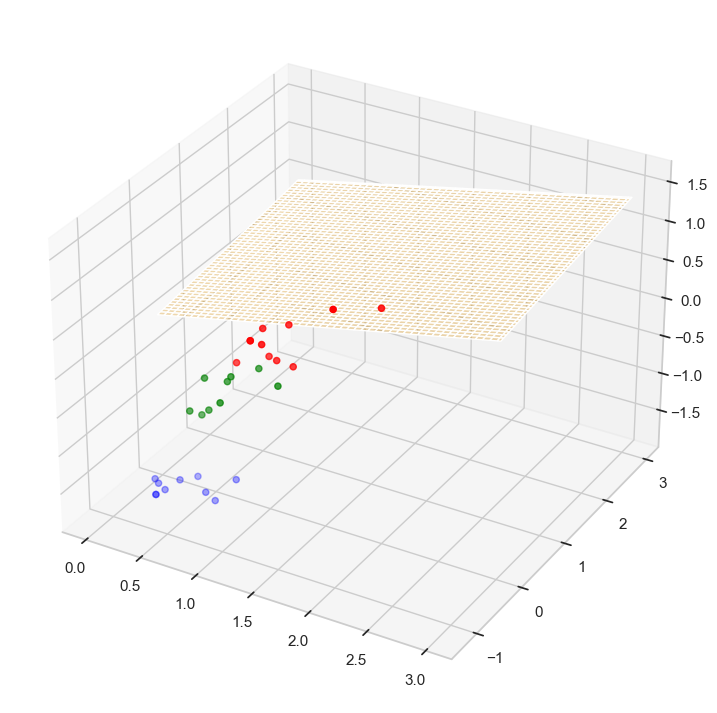

In [62]:

# Importer les bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définir le dictionnaire de mapping des couleurs pour les classes
color_map = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}

# Visualiser le dataset et les deux frontières de décision
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

# Tracer les points de données en utilisant les couleurs correspondant à chaque classe
ax.scatter(X_test[:,0], X_test[:, 1], X_test[:, 2], c=[color_map[class_name] for class_name in y_test], cmap='winter')

# Dessiner la première frontière de décision
x1 = np.linspace(0, 3, 100)
x2 = np.linspace(0, 3, 100)
x1, x2 = np.meshgrid(x1, x2)
x3_1 = (-W[0] * x1 - W[1] * x2 - b) / W[2]  # Pour la première classe
ax.plot_surface(x1, x2, x3_1, alpha=0.3, color='orange')

# Dessiner la deuxième frontière de décision
x3_2 = (-W[3] * x1 - W[4] * x2 - b) / W[5]  # Pour la deuxième classe
ax.plot_surface(x1, x2, x3_2, alpha=0.3, color='green')

# Tracer les nouveaux éléments prédits
new_1 = np.array([1.2, 0.3, 1.7])
new_2 = np.array([1.3, 0.6, 0.8])
new_3 = np.array([0.04, -1.1, 1.9])
ax.scatter(new_1[0], new_1[1], new_1[2], c='r')
ax.scatter(new_2[0], new_2[1], new_2[2], c='r')
ax.scatter(new_3[0], new_3[1], new_3[2], c='r')

# Prédire la classe des nouveaux éléments
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

# Afficher le graphique
plt.show()


# Iris-versicolor

In [23]:
y_versicolor=np.where(y_num==1,1,0)
#Split dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_versicolor,test_size=0.2,random_state=42)
#Normalisation
X_train=(X_train - X_train.mean())/X_train.std()
X_test=(X_test  - X_test.mean())/X_test.std()

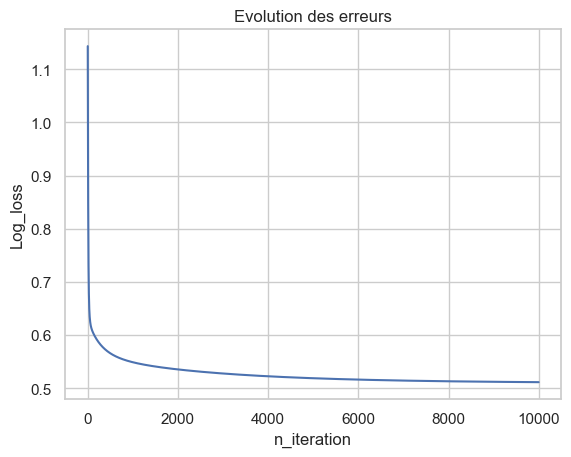

In [24]:
W,b=regression_logistique(X_train, y_train )

In [25]:
from sklearn.metrics import accuracy_score
y_pred,versicolor = predict(X_test, W, b)
print("Accuracy=",accuracy_score(y_test, y_pred))

[[0.50066995]
 [0.0562352 ]
 [0.70167332]
 [0.42754489]
 [0.53463564]
 [0.14513034]
 [0.40973402]
 [0.33811409]
 [0.84290632]
 [0.55591199]
 [0.26387889]
 [0.31315796]
 [0.1162085 ]
 [0.26065968]
 [0.05038523]
 [0.20769226]
 [0.38285239]
 [0.67651333]
 [0.48143155]
 [0.51408417]
 [0.20452595]
 [0.36571391]
 [0.1356462 ]
 [0.51408417]
 [0.08192817]
 [0.39289316]
 [0.71954108]
 [0.27454376]
 [0.31315796]
 [0.25681225]]
Accuracy= 0.7333333333333333


[0.00399652]
(array([False]), array([0.00399652]))
[0.00101995]
(array([False]), array([0.00101995]))
[0.66268832]
(array([ True]), array([0.66268832]))


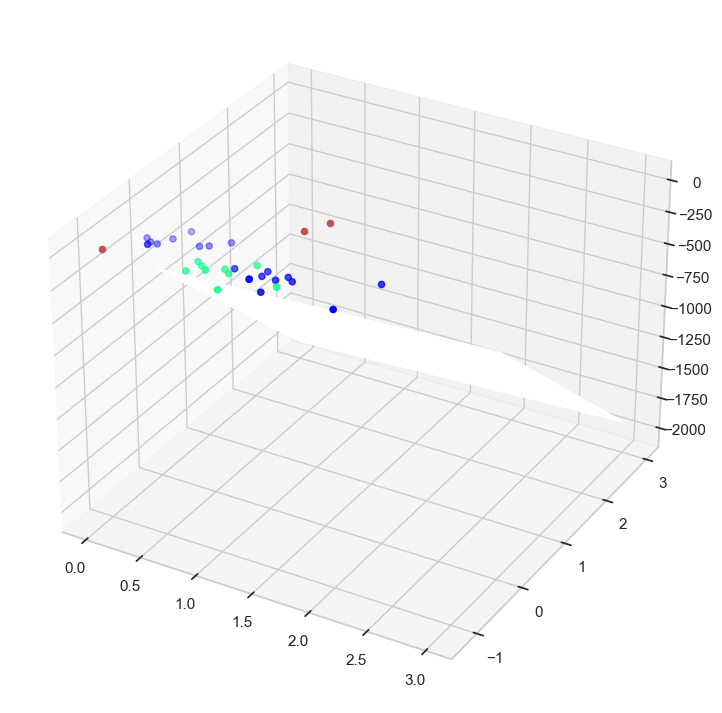

In [26]:
# Visualiser le dataset
import seaborn as sns
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:, 1], X_test[:, 2],c=y_test, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 3, 100)
x2 = np.linspace(0, 3, 100)
x1, x2 = np.meshgrid(x1, x2)
x3 = (-W[0] * x1 - W[1] * x2 - b) / W[2]
#dessiner la frontiere de descision
ax.plot_surface(x1, x2, x3, alpha=0.3, color='orange')

# Prédire la classe de nouveaux éléments
new_1=np.array([1.2,0.3,1.7])
new_2=np.array([1.3,0.6,0.8])
new_3=np.array([0.04,-1.1,1.9])
ax.scatter(new_1[0], new_1[1], new_1[2], c='r')
ax.scatter(new_2[0], new_2[1], new_2[2], c='r')
ax.scatter(new_3[0], new_3[1], new_3[2], c='r')

print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

# Iris-virginica


In [29]:
#Split dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_virginica,test_size=0.2,random_state=42)
#Normalisation
X_train=(X_train - X_train.mean())/X_train.std()
X_test=(X_test  - X_test.mean())/X_test.std()

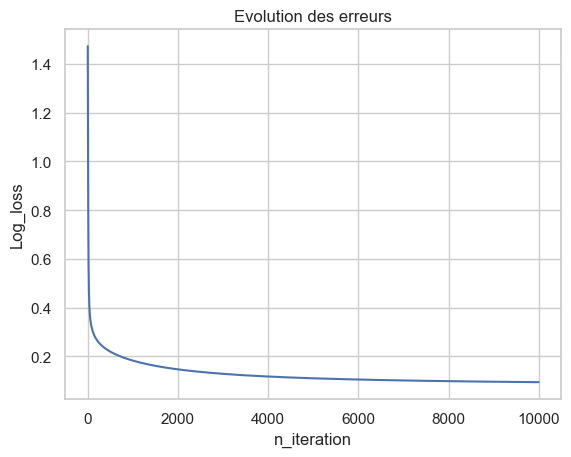

In [30]:
W,b=regression_logistique(X_train, y_train )

In [31]:
from sklearn.metrics import accuracy_score
y_pred,virginica = predict(X_test, W, b)
print("Accuracy=",accuracy_score(y_test, y_pred))
y_pred.shape

[[1.95441468e-01]
 [4.96043305e-10]
 [9.99962927e-01]
 [6.76893693e-02]
 [1.01805211e-01]
 [3.19244112e-10]
 [3.94357561e-04]
 [3.57710102e-01]
 [7.36876921e-02]
 [2.25381652e-03]
 [5.40374076e-01]
 [7.42256218e-10]
 [6.33645285e-11]
 [1.10093473e-09]
 [4.43127793e-10]
 [1.01375872e-01]
 [9.93293019e-01]
 [3.90935249e-03]
 [1.25957384e-01]
 [9.82097712e-01]
 [3.01741798e-09]
 [4.45901511e-01]
 [1.41526988e-09]
 [9.82097712e-01]
 [9.96251890e-01]
 [6.37836162e-01]
 [9.92939672e-01]
 [9.92690323e-01]
 [7.42256218e-10]
 [2.64126374e-09]]
Accuracy= 0.9333333333333333


(30, 1)

In [35]:
proba=np.hstack((setosa,versicolor,virginica))
proba

array([[1.60596227e-04, 5.00669953e-01, 1.95441468e-01],
       [9.92991739e-01, 5.62351983e-02, 4.96043305e-10],
       [2.69079292e-09, 7.01673322e-01, 9.99962927e-01],
       [5.07410591e-04, 4.27544885e-01, 6.76893693e-02],
       [2.99603087e-05, 5.34635636e-01, 1.01805211e-01],
       [9.93515397e-01, 1.45130342e-01, 3.19244112e-10],
       [2.15699692e-02, 4.09734016e-01, 3.94357561e-04],
       [2.17838485e-05, 3.38114090e-01, 3.57710102e-01],
       [4.49466574e-05, 8.42906317e-01, 7.36876921e-02],
       [3.07115627e-03, 5.55911989e-01, 2.25381652e-03],
       [6.28932331e-05, 2.63878890e-01, 5.40374076e-01],
       [9.95288903e-01, 3.13157962e-01, 7.42256218e-10],
       [9.96975986e-01, 1.16208499e-01, 6.33645285e-11],
       [9.94051938e-01, 2.60659685e-01, 1.10093473e-09],
       [9.98858338e-01, 5.03852294e-02, 4.43127793e-10],
       [4.69267273e-04, 2.07692261e-01, 1.01375872e-01],
       [3.39971138e-06, 3.82852387e-01, 9.93293019e-01],
       [2.51995890e-03, 6.76513

In [42]:
proba_reshaped = proba.reshape(-1, 3)
max_values = np.max(proba_reshaped, axis=1)

In [43]:
max_values

array([0.50066995, 0.99299174, 0.99996293, 0.42754489, 0.53463564,
       0.9935154 , 0.40973402, 0.3577101 , 0.84290632, 0.55591199,
       0.54037408, 0.9952889 , 0.99697599, 0.99405194, 0.99885834,
       0.20769226, 0.99329302, 0.67651333, 0.48143155, 0.98209771,
       0.99576873, 0.44590151, 0.99579452, 0.98209771, 0.99625189,
       0.63783616, 0.99293967, 0.99269032, 0.9952889 , 0.99315508])

In [44]:
#Split dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Normalisation
X_train=(X_train - X_train.mean())/X_train.std()
X_test=(X_test  - X_test.mean())/X_test.std()

In [57]:
result = pd.DataFrame(columns=['sepal_length','sepal_width','petal_length','actual_class','predicted_class','setosa %','versicolor%','verginica%','max%'])

for i in range(len(X_test)):
    unique_counts = [proba[i][0],proba[i][1],proba[i][2],]
    unique_values = ['iris-setosa','iris-versicolor','iris-verginica']
    result.loc[i] = [X_test[i][0],X_test[i][1],X_test[i][2],y_test[i],unique_values[int(unique_counts.index(max(unique_counts)))],proba[i][0], proba[i][1],proba[i][2],max_values[i]]

In [58]:
result

,sepal_length,sepal_width,petal_length,actual_class,predicted_class,setosa %,versicolor%,verginica%,max%
0,1.056688,-0.881770,0.234312,Iris-versicolor,iris-versicolor,1.605962e-04,0.500670,1.954415e-01,0.500670
1,0.821724,-0.294359,-1.527923,Iris-setosa,iris-setosa,9.929917e-01,0.056235,4.960433e-10,0.992992
2,1.996547,-0.999253,1.526618,Iris-virginica,iris-verginica,2.690793e-09,0.701673,9.999629e-01,0.999963
3,0.997947,-0.823029,0.116830,Iris-versicolor,iris-versicolor,5.074106e-04,0.427545,6.768937e-02,0.427545
4,1.467877,-0.881770,0.293053,Iris-versicolor,iris-versicolor,2.996031e-05,0.534636,1.018052e-01,0.534636
5,0.645500,-0.529323,-1.645405,Iris-setosa,iris-setosa,9.935154e-01,0.145130,3.192441e-10,0.993515
6,0.762983,-0.823029,-0.411841,Iris-versicolor,iris-versicolor,2.156997e-02,0.409734,3.943576e-04,0.409734
7,1.526618,-0.705547,0.469277,Iris-virginica,iris-verginica,2.178385e-05,0.338114,3.577101e-01,0.357710
8,1.115430,-1.234217,0.116830,Iris-versicolor,iris-versicolor,4.494666e-05,0.842906,7.368769e-02,0.842906
9,0.880465,-0.940511,-0.235617,Iris-versicolor,iris-versicolor,3.071156e-03,0.555912,2.253817e-03,0.555912


In [50]:
setosa_features = result[result['class'] == 'iris-setosa']
versicolor_features = result[result['class'] == 'iris-versicolor']
virginica_features = result[result['class'] == 'iris-verginica']


In [66]:
print("Features appartenant a la classe 'iris-setosa':")
print(setosa_features)

print("\nFeatures appartenant a la classe 'iris-versicolor':")
print(versicolor_features)

print("\nFeatures appartenant a la classe 'iris-verginica':")
print(virginica_features)


Features appartenant a la classe 'iris-setosa':
    sepal_length  sepal_width  petal_length actual_class predicted_class  \
1       0.821724    -0.294359     -1.527923  Iris-setosa     iris-setosa   
5       0.645500    -0.529323     -1.645405  Iris-setosa     iris-setosa   
11      0.293053    -0.764288     -1.704147  Iris-setosa     iris-setosa   
12      0.704241    -0.470582     -1.762888  Iris-setosa     iris-setosa   
13      0.351794    -0.705547     -1.645405  Iris-setosa     iris-setosa   
14      0.469277    -0.294359     -1.645405  Iris-setosa     iris-setosa   
20      0.234312    -0.646806     -1.586664  Iris-setosa     iris-setosa   
22      0.410535    -0.529323     -1.586664  Iris-setosa     iris-setosa   
28      0.293053    -0.764288     -1.704147  Iris-setosa     iris-setosa   
29      0.293053    -0.705547     -1.586664  Iris-setosa     iris-setosa   

    setosa %  versicolor%    verginica%      max%        class  
1   0.992992     0.056235  4.960433e-10  0.992992 